In [1]:
import pandas as pd
import numpy as np

In [2]:
crime2016 = pd.read_csv('2016crime.csv', thousands =',', encoding='euc-kr')
crime2016.head()

,지역,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,강남,3,3,24,26,339,269,2438,1129,2336,2096
1,강동,4,5,14,13,160,152,1754,902,2530,2201
2,강북,7,6,5,4,217,159,1222,672,2778,2482
3,강서,9,10,10,10,275,239,1952,1070,3204,2768
4,관악,6,7,12,10,322,264,2103,937,3235,2707


In [3]:
crime2016.rename(columns={crime2016.columns[0] : '관서명'}, inplace = True)
crime2016.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,강남,3,3,24,26,339,269,2438,1129,2336,2096
1,강동,4,5,14,13,160,152,1754,902,2530,2201
2,강북,7,6,5,4,217,159,1222,672,2778,2482
3,강서,9,10,10,10,275,239,1952,1070,3204,2768
4,관악,6,7,12,10,322,264,2103,937,3235,2707


In [4]:
import googlemaps

In [5]:
gmaps_key = "***********************************"
gmaps = googlemaps.Client(key=gmaps_key)

In [6]:
gmaps.geocode('서울중부경찰서', language='ko')
#구글맵을 사용해서 '서울중부경찰서'라는 단어를 검색한 결과 ->위도 경도 정보 확인 가능

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '을지로동',
    'short_name': '을지로동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27',
  'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.56499548029149,
     'lng': 126.9909285802915},
    'southwest': {'lat': 3

In [7]:
station_name = []
for name in crime2016['관서명']:
    station_name.append('서울' + str(name[:]) + '경찰서')
    
station_name

['서울강남경찰서',
 '서울강동경찰서',
 '서울강북경찰서',
 '서울강서경찰서',
 '서울관악경찰서',
 '서울광진경찰서',
 '서울구로경찰서',
 '서울금천경찰서',
 '서울남대문경찰서',
 '서울노원경찰서',
 '서울도봉경찰서',
 '서울동대문경찰서',
 '서울동작경찰서',
 '서울마포경찰서',
 '서울방배경찰서',
 '서울서대문경찰서',
 '서울서부경찰서',
 '서울서초경찰서',
 '서울성동경찰서',
 '서울성북경찰서',
 '서울송파경찰서',
 '서울수서경찰서',
 '서울양천경찰서',
 '서울영등포경찰서',
 '서울용산경찰서',
 '서울은평경찰서',
 '서울종로경찰서',
 '서울종암경찰서',
 '서울중구경찰서',
 '서울중랑경찰서',
 '서울혜화경찰서']

In [8]:
station_address = []
station_lat = []
station_lng = []

for name in station_name:
    tmp = gmaps.geocode(name, language='ko')
    station_address.append(tmp[0].get("formatted_address"))
    
    tmp_loc = tmp[0].get("geometry")

    station_lat.append(tmp_loc['location']['lat'])
    station_lng.append(tmp_loc['location']['lng'])
    
    print(name + '-->' + tmp[0].get("formatted_address"))
#구글맵에서 만들어둔 경찰서 이름을 이용해서 주소를 받아옴 - > 각 경찰서별 주소를 모두 얻어옴

서울강남경찰서-->대한민국 서울특별시 강남구 대치동 998
서울강동경찰서-->대한민국 서울특별시 강동구 성내1동 성내로 57
서울강북경찰서-->대한민국 서울특별시 강북구 번1동 오패산로 406
서울강서경찰서-->대한민국 서울특별시 양천구 신월동 화곡로 73
서울관악경찰서-->대한민국 서울특별시 관악구 봉천동
서울광진경찰서-->대한민국 서울특별시 광진구 구의1동 자양로 167
서울구로경찰서-->대한민국 서울특별시 구로구 가마산로 235
서울금천경찰서-->대한민국 서울특별시 금천구 시흥동 190
서울남대문경찰서-->대한민국 서울특별시 중구 회현동 한강대로 410
서울노원경찰서-->대한민국 서울특별시 노원구 하계동 노원로 283
서울도봉경찰서-->대한민국 서울특별시 도봉구 창4동 노해로 403
서울동대문경찰서-->대한민국 서울특별시 동대문구 청량리동 약령시로21길 29
서울동작경찰서-->대한민국 서울특별시 동작구 노량진1동 노량진로 148
서울마포경찰서-->대한민국 서울특별시 마포구 아현동 618-1
서울방배경찰서-->대한민국 서울특별시 서초구 방배본동 동작대로 204
서울서대문경찰서-->대한민국 서울특별시 서대문구 충현동 통일로 113
서울서부경찰서-->대한민국 서울특별시 은평구 대조동 통일로 757
서울서초경찰서-->대한민국 서울특별시 서초구 서초3동 반포대로 179
서울성동경찰서-->대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울성북경찰서-->대한민국 서울특별시 성북구 삼선동5가 301
서울송파경찰서-->대한민국 서울특별시 송파구 가락본동 9
서울수서경찰서-->대한민국 서울특별시 강남구 개포동 개포로 617
서울양천경찰서-->대한민국 서울특별시 양천구 신정6동 목동동로 99
서울영등포경찰서-->대한민국 서울특별시 영등포구 영등포동 영등포로46길 14
서울용산경찰서-->대한민국 서울특별시 용산구 원효로1가 백범로 329
서울은평경찰서-->대한민국 서울특별시 은평구 불광동 연서로 365
서울종로경찰서-->대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡

In [9]:
station_address

['대한민국 서울특별시 강남구 대치동 998',
 '대한민국 서울특별시 강동구 성내1동 성내로 57',
 '대한민국 서울특별시 강북구 번1동 오패산로 406',
 '대한민국 서울특별시 양천구 신월동 화곡로 73',
 '대한민국 서울특별시 관악구 봉천동',
 '대한민국 서울특별시 광진구 구의1동 자양로 167',
 '대한민국 서울특별시 구로구 가마산로 235',
 '대한민국 서울특별시 금천구 시흥동 190',
 '대한민국 서울특별시 중구 회현동 한강대로 410',
 '대한민국 서울특별시 노원구 하계동 노원로 283',
 '대한민국 서울특별시 도봉구 창4동 노해로 403',
 '대한민국 서울특별시 동대문구 청량리동 약령시로21길 29',
 '대한민국 서울특별시 동작구 노량진1동 노량진로 148',
 '대한민국 서울특별시 마포구 아현동 618-1',
 '대한민국 서울특별시 서초구 방배본동 동작대로 204',
 '대한민국 서울특별시 서대문구 충현동 통일로 113',
 '대한민국 서울특별시 은평구 대조동 통일로 757',
 '대한민국 서울특별시 서초구 서초3동 반포대로 179',
 '대한민국 서울특별시 성동구 행당동 왕십리광장로 9',
 '대한민국 서울특별시 성북구 삼선동5가 301',
 '대한민국 서울특별시 송파구 가락본동 9',
 '대한민국 서울특별시 강남구 개포동 개포로 617',
 '대한민국 서울특별시 양천구 신정6동 목동동로 99',
 '대한민국 서울특별시 영등포구 영등포동 영등포로46길 14',
 '대한민국 서울특별시 용산구 원효로1가 백범로 329',
 '대한민국 서울특별시 은평구 불광동 연서로 365',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46',
 '대한민국 서울특별시 성북구 종암동 종암로 135',
 '대한민국 서울특별시 중구 을지로동 수표로 27',
 '대한민국 서울특별시 중랑구 신내1동 신내역로3길 40-10',
 '대한민국 서울특별시 종로구 인의동 창경궁로 112-16']

In [10]:
station_lat
#위도

[37.5094352,
 37.528511,
 37.63730390000001,
 37.5397827,
 37.4743789,
 37.542873,
 37.494931,
 37.4568722,
 37.5547584,
 37.6423605,
 37.6533589,
 37.58506149999999,
 37.5130866,
 37.550814,
 37.4945959,
 37.5647848,
 37.6128611,
 37.4956054,
 37.5617309,
 37.5897482,
 37.5019065,
 37.49349,
 37.5165667,
 37.5179839,
 37.5387099,
 37.6283597,
 37.5755578,
 37.6020592,
 37.5636465,
 37.618692,
 37.5718529]

In [11]:
station_lng
#경도

[127.0669578,
 127.1268224,
 127.0273399,
 126.8299968,
 126.9509748,
 127.083821,
 126.886731,
 126.8970429,
 126.9734981,
 127.0714027,
 127.052682,
 127.0457679,
 126.9428498,
 126.954028,
 126.9831279,
 126.9667762,
 126.9274951,
 127.0052504,
 127.0363806,
 127.0161353,
 127.1271513,
 127.0772119,
 126.8656763,
 126.9075056,
 126.9659183,
 126.9287226,
 126.9848674,
 127.0321577,
 126.9895796,
 127.1047136,
 126.9989143]

In [12]:
gu_name = []

for name in station_address:
    tmp = name.split()
    
    tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0]
    
    gu_name.append(tmp_gu)

crime2016['구별'] = gu_name
crime2016.head(20)
#주소를 띄어쓰기, 공백으로 나누고 두번째 단어를 선택해서 구별이라는 칼럼으로 저장 

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,강남,3,3,24,26,339,269,2438,1129,2336,2096,강남구
1,강동,4,5,14,13,160,152,1754,902,2530,2201,강동구
2,강북,7,6,5,4,217,159,1222,672,2778,2482,강북구
3,강서,9,10,10,10,275,239,1952,1070,3204,2768,양천구
4,관악,6,7,12,10,322,264,2103,937,3235,2707,관악구
5,광진,4,4,11,6,279,234,2636,1057,2392,2011,광진구
6,구로,9,9,10,13,273,181,1910,861,3164,2680,구로구
7,금천,6,6,7,7,175,143,1264,654,2193,1946,금천구
8,남대문,1,1,5,4,57,52,946,429,890,832,중구
9,노원,5,6,6,9,159,142,1857,740,2516,2124,노원구


In [13]:
crime2016.to_csv('crime_googlemaps2016.csv', sep=',', encoding='utf-8')

In [14]:
crime2016_2_raw = pd.read_csv('crime_googlemaps2016.csv', encoding = 'utf-8')

crime2016_2_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,강남,3,3,24,26,339,269,2438,1129,2336,2096,강남구
1,1,강동,4,5,14,13,160,152,1754,902,2530,2201,강동구
2,2,강북,7,6,5,4,217,159,1222,672,2778,2482,강북구
3,3,강서,9,10,10,10,275,239,1952,1070,3204,2768,양천구
4,4,관악,6,7,12,10,322,264,2103,937,3235,2707,관악구


In [15]:
crime2016_2_raw = pd.read_csv('crime_googlemaps2016.csv', encoding='utf-8', index_col=0)
crime2016_2 = pd.pivot_table(crime2016_2_raw, index='구별', aggfunc=np.sum)
crime2016_2.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,413,516,42,39,5,5,1918,3587,3527,4002
강동구,152,160,13,14,5,4,902,1754,2201,2530
강북구,159,217,4,5,6,7,672,1222,2482,2778
관악구,264,322,10,12,7,6,937,2103,2707,3235
광진구,234,279,6,11,4,4,1057,2636,2011,2392


In [16]:
crime2016_2['강간검거율'] = crime2016_2['강간 검거']/crime2016_2['강간 발생'] *100
crime2016_2['강도검거율'] = crime2016_2['강도 검거']/crime2016_2['강도 발생'] *100
crime2016_2['살인검거율'] = crime2016_2['살인 검거']/crime2016_2['살인 발생'] * 100
crime2016_2['절도검거율'] = crime2016_2['절도 검거']/crime2016_2['절도 발생'] *100
crime2016_2['폭력검거율'] = crime2016_2['폭력 검거']/crime2016_2['폭력 발생'] * 100

del crime2016_2['강간 검거']
del crime2016_2['강도 검거']
del crime2016_2['살인 검거']
del crime2016_2['절도 검거']
del crime2016_2['폭력 검거']

crime2016_2.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516,39,5,3587,4002,80.038760,107.692308,100.000000,53.470867,88.130935
강동구,160,14,4,1754,2530,95.000000,92.857143,125.000000,51.425314,86.996047
강북구,217,5,7,1222,2778,73.271889,80.000000,85.714286,54.991817,89.344852
관악구,322,12,6,2103,3235,81.987578,83.333333,116.666667,44.555397,83.678516
광진구,279,11,4,2636,2392,83.870968,54.545455,100.000000,40.098634,84.071906


In [17]:
con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

for column in con_list:
    crime2016_2.loc[crime2016_2[column] > 100, column] = 100
    
crime2016_2.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516,39,5,3587,4002,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,160,14,4,1754,2530,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,217,5,7,1222,2778,73.271889,80.000000,85.714286,54.991817,89.344852
관악구,322,12,6,2103,3235,81.987578,83.333333,100.000000,44.555397,83.678516
광진구,279,11,4,2636,2392,83.870968,54.545455,100.000000,40.098634,84.071906


In [18]:
crime2016_2.rename(columns = {'강간 발생':'강간', '강도 발생' : '강도', '살인 발생':'살인', '절도 발생':'절도', '폭력 발생':'폭력'}, inplace=True)
crime2016_2.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516,39,5,3587,4002,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,160,14,4,1754,2530,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,217,5,7,1222,2778,73.271889,80.000000,85.714286,54.991817,89.344852
관악구,322,12,6,2103,3235,81.987578,83.333333,100.000000,44.555397,83.678516
광진구,279,11,4,2636,2392,83.870968,54.545455,100.000000,40.098634,84.071906


In [19]:
from sklearn import preprocessing

col = ['강간', '강도', '살인', '절도', '폭력']

x = crime2016_2[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime2016_2_norm = pd.DataFrame(x_scaled, columns = col, index = crime2016_2.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime2016_2_norm[col2] = crime2016_2[col2]
crime2016_2_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,1.000000,0.250000,0.970053,0.647487,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,0.135922,0.305556,0.166667,0.316578,0.290119,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,0.274272,0.055556,0.416667,0.126916,0.350328,73.271889,80.000000,85.714286,54.991817,89.344852
관악구,0.529126,0.250000,0.333333,0.440998,0.461277,81.987578,83.333333,100.000000,44.555397,83.678516
광진구,0.424757,0.222222,0.166667,0.631016,0.256616,83.870968,54.545455,100.000000,40.098634,84.071906


In [20]:
merge2016 = pd.read_csv('merge2016.csv', encoding='utf-8', index_col='구별')
crime2016_2_norm[['총인구', 'CCTV']] = merge2016[['총인구', '소계']]

crime2016_2_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,총인구,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,1.000000,0.250000,0.970053,0.647487,80.038760,100.000000,100.000000,53.470867,88.130935,534889,3983
강동구,0.135922,0.305556,0.166667,0.316578,0.290119,95.000000,92.857143,100.000000,51.425314,86.996047,434929,1483
강북구,0.274272,0.055556,0.416667,0.126916,0.350328,73.271889,80.000000,85.714286,54.991817,89.344852,317889,946
관악구,0.529126,0.250000,0.333333,0.440998,0.461277,81.987578,83.333333,100.000000,44.555397,83.678516,519316,2862
광진구,0.424757,0.222222,0.166667,0.631016,0.256616,83.870968,54.545455,100.000000,40.098634,84.071906,366874,1191


In [21]:
col = ['강간','강도','살인','절도','폭력']
crime2016_2_norm['범죄'] = np.sum(crime2016_2_norm[col], axis=1)
crime2016_2_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,총인구,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.250000,0.970053,0.647487,80.038760,100.000000,100.000000,53.470867,88.130935,534889,3983,3.867541
강동구,0.135922,0.305556,0.166667,0.316578,0.290119,95.000000,92.857143,100.000000,51.425314,86.996047,434929,1483,1.214841
강북구,0.274272,0.055556,0.416667,0.126916,0.350328,73.271889,80.000000,85.714286,54.991817,89.344852,317889,946,1.223738
관악구,0.529126,0.250000,0.333333,0.440998,0.461277,81.987578,83.333333,100.000000,44.555397,83.678516,519316,2862,2.014735
광진구,0.424757,0.222222,0.166667,0.631016,0.256616,83.870968,54.545455,100.000000,40.098634,84.071906,366874,1191,1.701278


In [22]:
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime2016_2_norm['검거'] = np.sum(crime2016_2_norm[col], axis=1)
crime2016_2_norm
#발생 건수의 합을 '범죄'라는 항목으로 두고 이를 합한다. 

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,총인구,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.250000,0.970053,0.647487,80.038760,100.000000,100.000000,53.470867,88.130935,534889,3983,3.867541,421.640561
강동구,0.135922,0.305556,0.166667,0.316578,0.290119,95.000000,92.857143,100.000000,51.425314,86.996047,434929,1483,1.214841,426.278504
강북구,0.274272,0.055556,0.416667,0.126916,0.350328,73.271889,80.000000,85.714286,54.991817,89.344852,317889,946,1.223738,383.322844
관악구,0.529126,0.250000,0.333333,0.440998,0.461277,81.987578,83.333333,100.000000,44.555397,83.678516,519316,2862,2.014735,393.554824
광진구,0.424757,0.222222,0.166667,0.631016,0.256616,83.870968,54.545455,100.000000,40.098634,84.071906,366874,1191,1.701278,362.586963
구로구,0.410194,0.194444,0.583333,0.372193,0.444040,66.300366,100.000000,100.000000,45.078534,84.702908,442766,2205,2.004204,396.081808
금천구,0.172330,0.111111,0.333333,0.141889,0.208303,81.714286,100.000000,100.000000,51.740506,88.736890,248820,1427,0.966967,422.191682
노원구,0.133495,0.083333,0.250000,0.353298,0.286720,89.308176,100.000000,100.000000,39.849219,84.419714,560350,1466,1.106846,413.577109
도봉구,0.046117,0.055556,0.083333,0.000000,0.025734,98.373984,100.000000,100.000000,56.812933,90.839695,339015,816,0.210740,446.026611


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform
path = "C:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')
#그래프에 대한 한글문제 해결하는 코드    

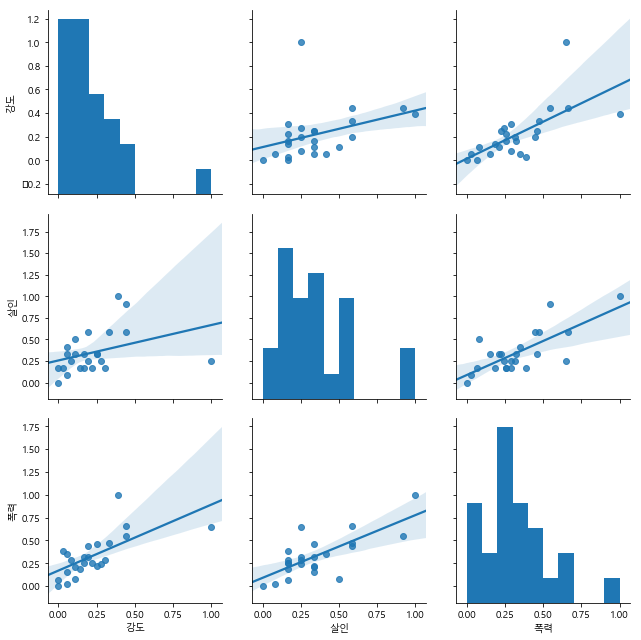

In [24]:
sns.pairplot(crime2016_2_norm, vars=["강도","살인","폭력"], kind='reg', size=3)
plt.show()
#강도와 폭력, 살인과 폭력, 강도와 살인 모두 양의 상관관계를 보여줌

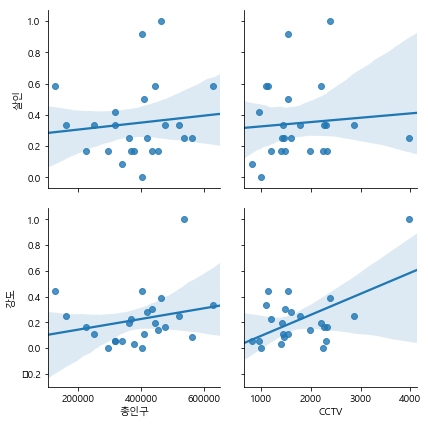

In [25]:
sns.pairplot(crime2016_2_norm, x_vars=["총인구","CCTV"], y_vars=["살인","강도"], kind='reg', size=3)
plt.show()
#인구수와 cctv 개수, 그리고 살인과 강도에 대한 그래프 
#전체적인 상관계수는 CCTV와 살인의 관계가 낮을지 몰라도 CCTV가 없을 때 살인이 많이 일어나는 구간이 있다.
#즉, CCTV 개수를 기준으로 좌측면에 살인과 강도의 높은 수를 갖는 데이터가 보인다.

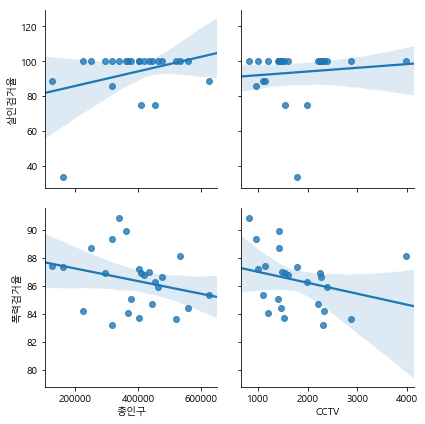

In [26]:
sns.pairplot(crime2016_2_norm, x_vars=["총인구","CCTV"], y_vars=["살인검거율","폭력검거율"], kind='reg', size=3)
plt.show()
#살인 및 폭력검거율과 CCTV의 관계가 양의 상관관계가 아니다. 오히려 음의 상관계수도 보인다. 또 인구수와 살인 및 폭력 검거율도 음의 상관관계

In [27]:
tmp_max = crime2016_2_norm['검거'].max()
crime2016_2_norm['검거'] =crime2016_2_norm['검거'] /tmp_max *100
crime2016_2_norm_sort = crime2016_2_norm.sort_values(by = '검거', ascending=False)
crime2016_2_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,총인구,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.046117,0.055556,0.083333,0.000000,0.025734,98.373984,100.000000,100.0,56.812933,90.839695,339015,816,0.210740,100.000000
성동구,0.000000,0.000000,0.166667,0.153298,0.068949,75.000000,100.000000,100.0,69.135802,86.967264,294822,2249,0.388913,96.654113
동대문구,0.208738,0.194444,0.250000,0.382888,0.317310,83.157895,100.000000,100.0,55.206186,89.969720,361834,1419,1.353380,96.033239
강동구,0.135922,0.305556,0.166667,0.316578,0.290119,95.000000,92.857143,100.0,51.425314,86.996047,434929,1483,1.214841,95.572437
금천구,0.172330,0.111111,0.333333,0.141889,0.208303,81.714286,100.000000,100.0,51.740506,88.736890,248820,1427,0.966967,94.656164


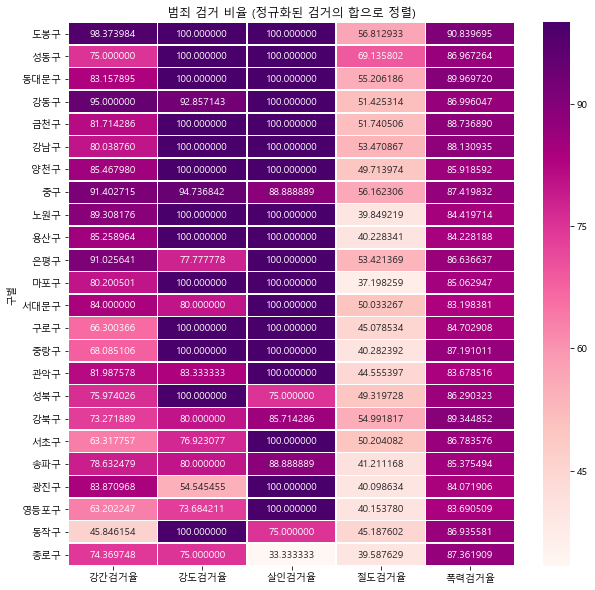

In [28]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime2016_2_norm_sort = crime2016_2_norm.sort_values(by = '검거', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime2016_2_norm_sort[target_col], annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()
#검거율의 합계인 검거 항목 최고값을 100으로 한정하고 그 값으로 정렬

절도 검거율은 다른 검거율에 비해 낮다. 그리고 그래프의 하단으로 갈수록 검거율이 낮은데 강남 3구 중에서 서초구가 보인다.
전반적으로 검거율이 우수한 구는 도봉구, 동대문구, 성동구로 보인다.

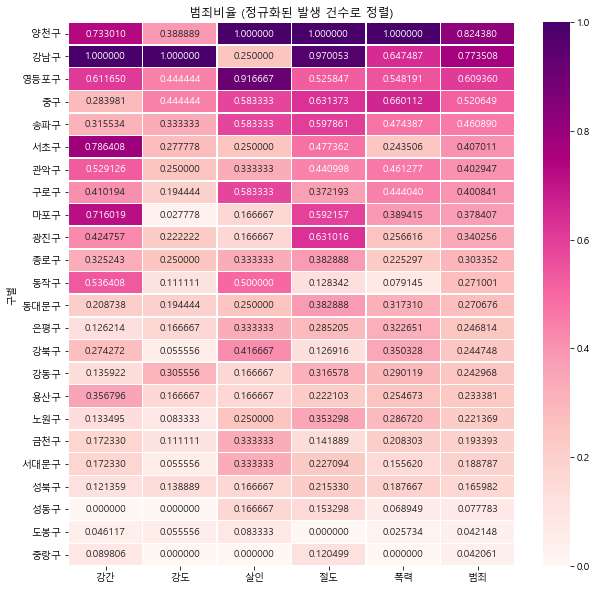

In [29]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime2016_2_norm['범죄'] = crime2016_2_norm['범죄'] / 5
crime2016_2_norm_sort = crime2016_2_norm.sort_values(by = '범죄', ascending=False)
plt.figure(figsize = (10,10))
sns.heatmap(crime2016_2_norm_sort[target_col], annot=True, fmt='f', linewidths=.5,cmap='RdPu')
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

-> 발생건수의 합으로 정렬해서 히트맵으로 관찰해본 결과
강남구, 양천구, 영등포구가 범죄 발생 건수가 높다. 그리고 송파구와 서초구도 낮다고 볼 수 없다. 

In [30]:
crime2016_2_norm.to_csv('crime_final2016.csv', sep=',', encoding='utf-8')

In [31]:
import folium

In [32]:
import json
geo_path = '02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding ='utf-8'))

In [33]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime2016_2_norm['살인'],
               columns = [crime2016_2_norm.index, crime2016_2_norm['살인']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

C:\anaconda\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


살인 발생 건수로 확인

In [34]:

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime2016_2_norm['강간'],
               columns = [crime2016_2_norm.index, crime2016_2_norm['강간']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

C:\anaconda\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


강간 발생 건수

In [35]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime2016_2_norm['범죄'],
               columns = [crime2016_2_norm.index, crime2016_2_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map


C:\anaconda\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


범죄 발생 건수표시

In [36]:
tmp_criminal = crime2016_2_norm['살인'] /  crime2016_2_norm['총인구'] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = tmp_criminal,
               columns = [crime2016_2.index, tmp_criminal],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

C:\anaconda\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


인구 대비 범죄 발생 비율을 나타냄. 
범죄 전체 발생 건수에 인구수를 나누고 소수점 밑으로 가서 적절한 값을 곱하여 나타난 값
인구 대비 범죄 발생 건수로 보면 강남 3구가 1위는 아니지만 안전도가 제일 높다고 할 수는 없다.
그런데 중구와 종로구의 범죄율이 엄청 높아졌다. 아마 거주 인구는 적고, 관광지여서 그런 게 아닐지 추측해본다.

In [37]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime2016_2_norm['검거'],
               columns = [crime2016_2_norm.index, crime2016_2_norm['검거']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map

C:\anaconda\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [38]:
crime2016_2_raw['lat'] = station_lat
crime2016_2_raw['lng'] = station_lng

col = ['살인 검거', '강도 검거', '강간 검거', '절도 검거', '폭력 검거']
tmp = crime2016_2_raw[col] / crime2016_2_raw[col].max()
    
crime2016_2_raw['검거'] = np.sum(tmp, axis=1)

crime2016_2_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,강남,3,3,24,26,339,269,2438,1129,2336,2096,강남구,37.509435,127.066958,3.768434
1,강동,4,5,14,13,160,152,1754,902,2530,2201,강동구,37.528511,127.126822,2.890511
2,강북,7,6,5,4,217,159,1222,672,2778,2482,강북구,37.637304,127.027340,2.532884
3,강서,9,10,10,10,275,239,1952,1070,3204,2768,양천구,37.539783,126.829997,3.768981
4,관악,6,7,12,10,322,264,2103,937,3235,2707,관악구,37.474379,126.950975,3.478248


In [39]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime2016_2_raw.index:
    folium.Marker([crime2016_2_raw['lat'][n], 
                   crime2016_2_raw['lng'][n]]).add_to(map)
    
map

In [40]:

map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime2016_2_raw.index:
    folium.CircleMarker([crime2016_2_raw['lat'][n], crime2016_2_raw['lng'][n]], 
                        radius = crime2016_2_raw['검거'][n]*10, 
                        color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
    
map

In [41]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = crime2016_2_norm['범죄'],
               columns = [crime2016_2_norm.index, crime2016_2_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

for n in crime2016_2_raw.index:
    folium.CircleMarker([crime2016_2_raw['lat'][n], crime2016_2_raw['lng'][n]], 
                        radius = crime2016_2_raw['검거'][n]*10, 
                        color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
    
map

C:\anaconda\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
